### Run SKS from Python
Chloé Fandel 2018

In [23]:
#Imports:
import subprocess as sp
import pandas as pd
import matplotlib.pyplot as plt

#embed matplotlib figures into notebooks:
%matplotlib inline  

command: C:/Program Files/MATLAB/R2017b/bin/matlab.exe -nosplash -nodesktop -wait -r "cd(fullfile('C:/Users/Chloe/Desktop/PhD/SKS')), run_SKS, exit" 
running MATLAB script...
done
          X          Y  Z
0  581487.5  5244563.0  0
1  581537.5  5244563.0  0
2  581587.5  5244563.0  0
3  581637.5  5244563.0  0
4  581687.5  5244563.0  0


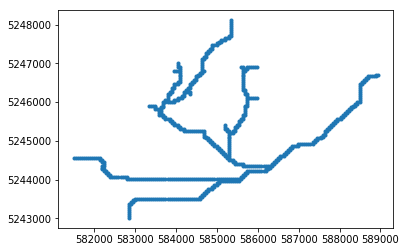

In [25]:
#Set paths and options:
#note: paths need to have forward slashes not backslashes (why?!)
program  = 'C:/Program Files/MATLAB/R2017b/bin/matlab.exe'  #path to MATLAB exe
folder   = 'C:/Users/Chloe/Desktop/PhD/SKS'                 #path to folder with SKS MATLAB scripts to run
script   = 'run_SKS'                                        #name of script to run
outputs  = r'C:\Users\Chloe\Desktop\PhD\SKS\output_SKS'     #path to folder where outputs are stored (this one should have backslashes)
options  = '-nosplash -nodesktop -wait'                     #optional: set run options  (nosplash? nodesktop means MATLAB won't open a new desktop window, wait means Python will wait until MATLAB is done beore continuing (needs to be paired with p.wait() after sp.Popen))
has_args = False                                            #set whether the MATLAB script needs arguments (i.e. is it a function?)

#Optional: define arguments to feed to function
if has_args ==True:
    script   = 'run_SKS_fun'                                #select script version with arguments
    b = 5 
    h = 3
    args = '({},{})'.format(b,h)                            #put all args into one string

#Set function string:
#Structure:  """path_to_exe optional_arguments -r "cd(fullfile('path_to_folder')), script_name, exit" """
#Example:    """C:/Program Files/MATLAB/R2017b/bin/matlab.exe -r "cd(fullfile('C:/Users/Chloe/Desktop/PhD/SKS/')), run_SKS, exit" """
#basically, needs to know where the program to use lives, then takes some optional settings, -r runs the program, cd changes to the directory with the script, then needs the name of the script (possibly with arguments), then exits
fun =  """{} {} -r "cd(fullfile('{}')), {}, exit" """.format(program, options, folder, script)  #create function string that tells subprocess what to do
if has_args==True:
    fun = """{} {} -r "cd(fullfile('{}')), {}{}, exit" """.format(program, options, folder, script, args)

#Run MATLAB:
print('running SKS in MATLAB...')
p = sp.Popen(fun)                     #open the subprocess & run the MATLAB script 
p.wait()                              #wait until MATLAB is done before proceeding (this needs to be paired with -wait in options?)
print('done')                         #if the run is successful, an output file names a.mat should appear in the folder with the MATLAB scripts

#Import MATLAB output files back into Python:
nodes = pd.read_csv(outputs + '\output_SKS_nodes', sep=' ', names=['X','Y','Z'])
plt.scatter(nodes.X,nodes.Y, marker='.')